In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Kaggel data

In [ ]:
# api_key = {
# 'username': 'username',
# 'key': 'key'}

# kaggle_path = Path('/root/.kaggle')
# os.makedirs(kaggle_path, exist_ok=True)

# with open (kaggle_path/'kaggle.json', 'w') as handl:
#     json.dump(api_key,handl)

# os.chmod(kaggle_path/'kaggle.json', 600)

In [ ]:
# !kaggle competitions download -c kkbox-music-recommendation-challenge

100% 345M/345M [00:04<00:00, 108MB/s] 
100% 345M/345M [00:04<00:00, 87.9MB/s]


In [ ]:
# !unzip kkbox-music-recommendation-challenge.zip

In [ ]:
# !p7zip -d *.7z

# Основа

In [2]:
data_path = "/content/drive/MyDrive/proj_hse/vk_rs"

In [3]:
MEMBERS = f"{data_path}/members.csv"
SONG_FEAT = f"{data_path}/song_extra_info.csv"
SONGS = f"{data_path}/songs.csv"
TRAIN = f"{data_path}/train.csv"

In [4]:
members_df = pd.read_csv(MEMBERS)
song_feat_df = pd.read_csv(SONG_FEAT)
songs_df = pd.read_csv(SONGS)
train_df = pd.read_csv(TRAIN)

In [5]:
song_feat_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
merge_songs = songs_df.merge(song_feat_df, how = 'left', on = 'song_id')

Посмотрим описание признаков

In [8]:
merge_songs.describe(include='all')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
count,2296320,2.296320e+06,2202204,2296320,1224962,351014,2.296319e+06,2295419,2158892
unique,2296320,NaN,1045,222363,329822,110924,NaN,1168762,1806410
top,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,NaN,465,Various Artists,Neuromancer,Traditional,NaN,Intro,GBPS81518952
freq,1,NaN,567911,145916,17888,1751,NaN,1734,207
mean,NaN,2.469935e+05,NaN,NaN,NaN,NaN,3.237800e+01,NaN,NaN
std,NaN,1.609200e+05,NaN,NaN,NaN,NaN,2.433241e+01,NaN,NaN
min,NaN,1.850000e+02,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN
25%,NaN,1.836000e+05,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN
50%,NaN,2.266270e+05,NaN,NaN,NaN,NaN,5.200000e+01,NaN,NaN
75%,NaN,2.772690e+05,NaN,NaN,NaN,NaN,5.200000e+01,NaN,NaN


Теперь посмотрим на распределение `NaN` значений

In [30]:
isna_sum_df = pd.DataFrame(merge_songs.isna().sum())
isna_sum_df

,0
song_id,0
song_length,0
genre_ids,94116
artist_name,0
composer,1071358
lyricist,1945306
language,1
name,901
isrc,137428


# Обработка ISRC и NaN значений

Посмотрим на доли пропусков по каждому признаку

In [31]:
for idx in isna_sum_df.index:
  isna_sum_df.loc[idx] = round(isna_sum_df.loc[idx] / merge_songs.shape[0], 2)

<ipython-input-31-d21c889110c4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  isna_sum_df.loc[idx] = round(isna_sum_df.loc[idx] / merge_songs.shape[0], 2)


In [32]:
isna_sum_df

,0
song_id,0.00
song_length,0.00
genre_ids,0.04
artist_name,0.00
composer,0.47
lyricist,0.85
language,0.00
name,0.00
isrc,0.06


Можем заметить, что у признаков `composer` и `lyricist` очень высокая доля пропусков, что может говорить о том, что либо они решили остаться инкогнито, либо сам исполнитель является и композитором, и автором своих песен

Т.к. пропусков очень много, будет отмечать эти пропуски, т.к. информация о том, что данные пропущены, тоже информация

In [33]:
genres = set()
for genre in merge_songs.genre_ids.values:
  genres = genres.union(set(str(genre).split('|')))
genres = list(genres)

In [34]:
sorted([int(x) for x in genres if x != 'nan'])[:5]

[87, 94, 95, 102, 109]

In [35]:
merge_songs['genre_ids'] = merge_songs['genre_ids'].fillna(0)
merge_songs['composer'] = merge_songs['composer'].fillna('Unknown composer')
merge_songs['lyricist'] = merge_songs['lyricist'].fillna('Unknown lyricist')
merge_songs['language'] = merge_songs['language'].fillna(-1)
merge_songs['name'] = merge_songs['name'].fillna('Unknown name')
merge_songs['isrc'] = merge_songs['isrc'].fillna('Unknown isrc')

Теперь имеет смысл обработать признак `ISRC`, т.к. из этой кодировки можно достать ещё кучу полезных призанков: страну регистрации песни, организация-издатель и год регистрации песни.

In [36]:
merge_songs['country'] = merge_songs['isrc'].apply(lambda x: x[:2] if "Unknown" not in x else "Unknown country")
merge_songs['organization'] = merge_songs['isrc'].apply(lambda x: x[2:5] if "Unknown" not in x else "Unknown org")
merge_songs['year_of_registration'] = merge_songs['isrc'].apply(lambda x: x[5:7] if "Unknown" not in x else "Unknown year")

Посмторим на распределение некотрых признаков

## Распределение топ стран по выпуску песен за годы, в которых больше всего выпущено песен

In [37]:
top_years = merge_songs['year_of_registration'].value_counts().head(6).index.drop('Unknown year')

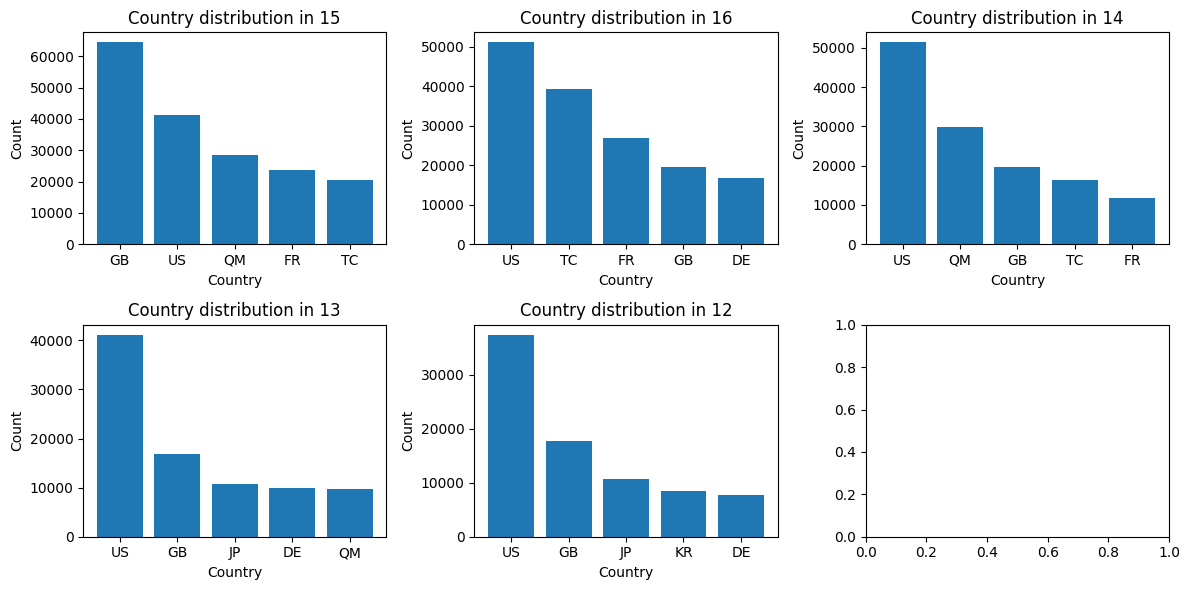

In [45]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(6)
fig.set_figwidth(12)

c = 0
for i in range(2):
  for j in range(3):
    if c < 5:
      tmp_top_ctr = merge_songs[merge_songs['year_of_registration'] == top_years[c]]['country'].value_counts().head()
      ax[i, j].bar(tmp_top_ctr.index, tmp_top_ctr.values)
      ax[i, j].set_title(f"Country distribution in {top_years[c]}")
      ax[i, j].set_xlabel('Country')
      ax[i, j].set_ylabel('Count')
      c+=1

plt.tight_layout()

Можем увидеть, что доминирующей страной является `US`, что может говорить о том, что чаще стоит рекомендовать песни из `US`  

## Посмторим на распределение песен по годам

In [39]:
year_dist = merge_songs['year_of_registration'][merge_songs['year_of_registration'] != "Unknown year"].value_counts().head()
year_dist

,count
year_of_registration,
15,268193
16,254269
14,211515
13,136347
12,130030


Text(0, 0.5, 'Count')

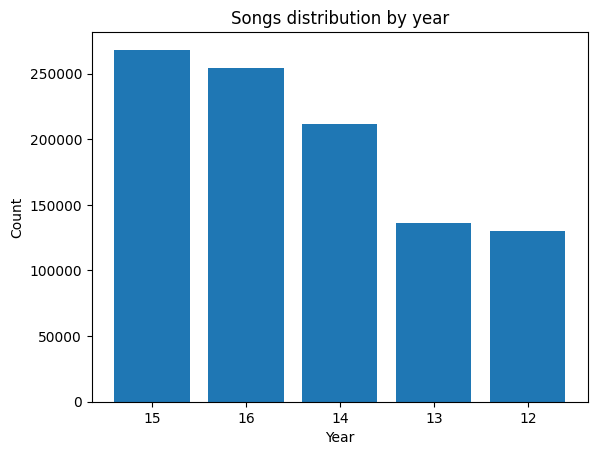

In [43]:
plt.bar(year_dist.index, year_dist.values)
plt.title("Songs distribution by year")
plt.xlabel('Year')
plt.ylabel('Count')

## Посмотрим на зависимость средней длины песни по годам

In [41]:
mean_sl_y = merge_songs[['song_length', 'year_of_registration']].groupby(by = "year_of_registration").mean().iloc[:-1]

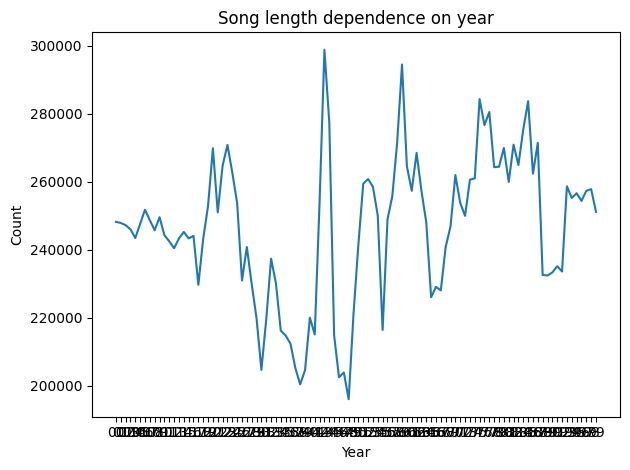

In [47]:
plt.plot(mean_sl_y.index, mean_sl_y.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Song length dependence on year')
plt.tight_layout()

## Посмотрим на выбросы в признаке `song_length`

In [49]:
merge_songs.select_dtypes(np.number)

,song_length,language
0,247640,3.0
1,197328,31.0
2,231781,31.0
3,273554,3.0
4,140329,52.0
...,...,...
2296315,20192,-1.0
2296316,273391,3.0
2296317,445172,52.0
2296318,172669,52.0


In [52]:
data = merge_songs['song_length'].values

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in data if x < lower_bound or x > upper_bound]

<Axes: >

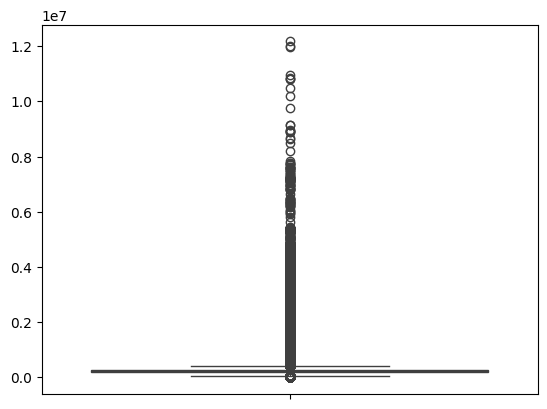

In [54]:
sns.boxplot(merge_songs['song_length'].values)

In [56]:
print(f"Доля выбросов: {len(outliers) / merge_songs.shape[0]}")

Доля выбросов: 0.06474576714046823


 Доля выбросов достаточно небольшая, поэтому можно удалить эти выбросы

In [61]:
merge_songs = merge_songs[merge_songs['song_length'].apply(lambda x: lower_bound <= x <= upper_bound)]